In [103]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from   itertools import product
from   collections import Counter

## Problem 1: Generalized dice
### 1.Modify your computer program to simulate the roll of N dice. Your program should let the dice have any number of sides, but the same number of sides for each die. The number of dice and the number of sides should be read in at the start of the program. One trial will consist of N rolls. Your program should calculate the sum of the N numbers that occur during each trial. It should also compare the results for the mean, variance, and standard deviation of that sum with the theoretical predictions.

sides    numbers
 4             3
 6             3
------------------------------------
sum        count
 6             8
 7            42
 8           144
 9           375
10           954
11          1673
12          2974
13          4418
14          6106
15          7912
16          9434
17         10522
18         10960
19         10623
20          9487
21          7840
22          6142
23          4298
24          2890
25          1688
26           892
27           411
28           155
29            45
30             7
average:      17.9909    
variance:     12.5265    
deviation:    3.5393     


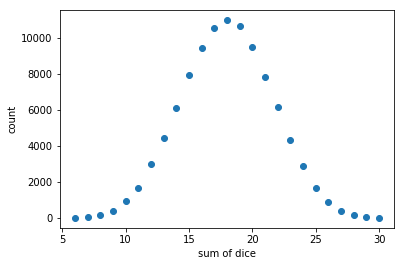

In [121]:
def dice(s):
    """ given how many sides, return one trial of throwing a dice of s sides"""
    return random.randint(1,s)

def one_trial(*pairs): #(sides,numbers)
    """given the sides and numbers of dices,return the result of one trial"""
    result = []
    for pair in pairs:
        sides,numbers = pair
        result += [dice(sides) for _ in range(numbers)]
    return result

def sum_dices(*pairs,N=100):
    """given N trials, return the sum of the dices"""
    count = Counter([sum(one_trial(*pairs)) for _ in range(N)])
    return count

def display(*pairs,trials=100):
    print("sides"+" "*4+"numbers")
    for pair in pairs:
        print("{:2}{:>14}".format(pair[0],pair[1]))
    result = sum_dices(*pairs,N=trials)
    order  = sorted(result.keys())
    print("------------------------------------")
    print("sum"+" "*8+"count")
    for o in order:
        print("{:2}{:>14}".format(o,result[o]))
    cal_a  = sum([num*times/trials for (num,times) in result.items()])
    cal_v  = sum([num**2*times/trials for (num,times) in result.items() ])-cal_a**2
    cal_s  = cal_v**(1/2)
    print("average:  {:^15.4f}".format(cal_a))
    print("variance: {:^15.4f}".format(cal_v))
    print("deviation:{:^15.4f}".format(cal_s))
    X,Y = zip(*result.items())
    plt.scatter(X,Y)
    plt.xlabel("sum of dice")
    plt.ylabel("count")
display((4,3),(6,3),trials=100000)

As for the theoretical calculation, I can solve it with some simple summention formulas, therefore I would trust the result would bet the same as we assume the probability is uniform and then calculate the mean,variance and standard deviation.

In [122]:
def situations(*pairs):
    """given the pairs of (sides,numbers) and return all the situation of one trial"""
    def calculate(pairs):
        if  len(pairs)==1:
            pair = pairs[0]
            sides,numbers = pair[0],pair[1]
            return list(map("".join,product(''.join([str(s) for s in range(1,sides+1)]),repeat=numbers)))
        elif len(pairs)>=2:
            return [a+b for a,b in product(calculate([pairs[0]]),calculate(pairs[1:]))]
    return calculate(pairs)
def predict_sum(total_situations):
    count = Counter(list(map(sum,[[int(x) for x in s] for s in total_situations])))
    pre_a  = sum([num*times/len(total_situations) for (num,times) in count.items()])
    pre_v  = sum([num**2*times/len(total_situations) for (num,times) in count.items() ])-pre_a**2
    pre_s  = pre_v**(1/2)
    return pre_a,pre_v,pre_s

total = (situations((4,1),(6,1)))
print(predict_sum(total))

(6.0, 4.166666666666664, 2.0412414523193143)


something interesting is that we find **the average,variance of the sum is the same as the sum of individual average and variance **

In [124]:
test1 = predict_sum(situations((4,1),(6,2)))
test2 = predict_sum(situations((6,2)))
individual_sum = list(map(lambda x,y: x+y,test1,test2))
print(test1)
print(test2)
print(individual_sum)

(9.5, 7.083333333333329, 2.6614532371118846)
(7.000000000000001, 5.833333333333314, 2.415229457698236)
[16.5, 12.916666666666643, 5.0766826948101205]


The average is not so surprising, for we know the average itself is a linear calculation. 
But what about variance? </br>
I spent some time searching and find some useful infomation.https://stats.stackexchange.com/questions/184998/the-linearity-of-variance . Roughly, if two random variables are indepdent, then the sum of variance would be the same as variance of the sum of these two random variable. Which specify the situation we encounter.

### 2.Test the calculations that we have carried out for the mean, variance, and standard deviation of the sum of the numbers on the dice. In each case, obtain data for a couple of different run-lengths. Investigate the cases listed below. (a) Two dice, each with ten sides. (b) Ten dice, each with twenty sides.

[(('a', 'a'), ('a', 'a')), (('a', 'a'), ('a', 'd')), (('a', 'a'), ('d', 'a')), (('a', 'a'), ('d', 'd')), (('a', 'd'), ('a', 'a')), (('a', 'd'), ('a', 'd')), (('a', 'd'), ('d', 'a')), (('a', 'd'), ('d', 'd')), (('d', 'a'), ('a', 'a')), (('d', 'a'), ('a', 'd')), (('d', 'a'), ('d', 'a')), (('d', 'a'), ('d', 'd')), (('d', 'd'), ('a', 'a')), (('d', 'd'), ('a', 'd')), (('d', 'd'), ('d', 'a')), (('d', 'd'), ('d', 'd'))]


123
[((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 1), (1, 3)), ((1, 1), (2, 1)), ((1, 1), (2, 2)), ((1, 1), (2, 3)), ((1, 1), (3, 1)), ((1, 1), (3, 2)), ((1, 1), (3, 3)), ((1, 2), (1, 1)), ((1, 2), (1, 2)), ((1, 2), (1, 3)), ((1, 2), (2, 1)), ((1, 2), (2, 2)), ((1, 2), (2, 3)), ((1, 2), (3, 1)), ((1, 2), (3, 2)), ((1, 2), (3, 3)), ((1, 3), (1, 1)), ((1, 3), (1, 2)), ((1, 3), (1, 3)), ((1, 3), (2, 1)), ((1, 3), (2, 2)), ((1, 3), (2, 3)), ((1, 3), (3, 1)), ((1, 3), (3, 2)), ((1, 3), (3, 3)), ((2, 1), (1, 1)), ((2, 1), (1, 2)), ((2, 1), (1, 3)), ((2, 1), (2, 1)), ((2, 1), (2, 2)), ((2, 1), (2, 3)), ((2, 1), (3, 1)), ((2, 1), (3, 2)), ((2, 1), (3, 3)), ((2, 2), (1, 1)), ((2, 2), (1, 2)), ((2, 2), (1, 3)), ((2, 2), (2, 1)), ((2, 2), (2, 2)), ((2, 2), (2, 3)), ((2, 2), (3, 1)), ((2, 2), (3, 2)), ((2, 2), (3, 3)), ((2, 3), (1, 1)), ((2, 3), (1, 2)), ((2, 3), (1, 3)), ((2, 3), (2, 1)), ((2, 3), (2, 2)), ((2, 3), (2, 3)), ((2, 3), (3, 1)), ((2, 3), (3, 2)), ((2, 3), (3, 3)), ((3, 1), (1, 1)), ((3, 

In [39]:
def total(*pairs):
    return pairs
print((total((4,2),(6,1),(2,1))))

((4, 2), (6, 1), (2, 1))
